In [1]:
!pip install -q keras
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,Activation,BatchNormalization, Convolution2D, MaxPooling2D,BatchNormalization
from keras.utils import np_utils 
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.datasets import cifar10
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


[9]


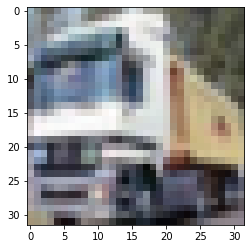

In [4]:
plt.imshow(X_train[1])
print(y_train[1])

In [5]:
X_train = X_train.reshape(X_train.shape[0], 32, 32,3)
X_test = X_test.reshape(X_test.shape[0], 32,32,3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [6]:
model1 = Sequential()

model1.add(Convolution2D(10, 3, activation='relu', input_shape=(32,32,3))) # channel dimensions = 30x30x10    
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Convolution2D(16, 3, activation='relu'))                        # channel dimensions = 28x28x16    
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Convolution2D(16, 1, activation='relu'))                        # channel dimensions = 28x28x16    
model1.add(MaxPooling2D(pool_size=(2, 2)))                                 # channel dimensions = 14x14x16   

# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(32, 3, activation='relu'))#10                     # channel dimensions = 12x12x32    
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(32, 3, activation='relu'))#8                      # channel dimensions = 10x10x32    
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(32, 3, activation='relu'))#6                      # channel dimensions = 8x8x32   
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Convolution2D(16, 3, activation='relu'))#6                      # channel dimensions = 6x6x16   
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Convolution2D(16, 3, activation='relu'))#6                      # channel dimensions = 4x4x16   
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

# Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)
model1.add(Convolution2D(10, 4))                                           # using 4x4 kernel to see the complete image

# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model1.add(Flatten())
#Using softmax activation function at the last layer which is used for multi class classification
model1.add(Activation('softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 10)        280       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 10)        40        
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        1456      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        2

In [7]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model1.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.
391/391 [==============================] - 52s 13ms/step - loss: 1.9996 - accuracy: 0.2878 - val_loss: 2.2838 - val_accuracy: 0.2575
Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0022744503.
391/391 [==============================] - 4s 11ms/step - loss: 1.3875 - accuracy: 0.4934 - val_loss: 1.4132 - val_accuracy: 0.4942
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0018315018.
391/391 [==============================] - 4s 10ms/step - loss: 1.2474 - accuracy: 0.5516 - val_loss: 1.2246 - val_accuracy: 0.5661
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0015329586.
391/391 [==============================] - 4s 11ms/step - loss: 1.1619 - accuracy: 0.5796 - val_loss: 1.1847 - val_accuracy: 0.5818
Epoch 5/20

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0013181019.
391/391 [==============================] - 

In [8]:
score = model1.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model1.predict(X_test)
index1={}
for i, k in enumerate(y_pred[:1][0]):
  index1.update({k:i})
print('Prediction:',index1[max(index1)])
print('Actual',y_test[:1][0])

[0.8860236406326294, 0.6876000165939331]
Prediction: 3
Actual [3]


In [9]:
model2 = Sequential()

model2.add(Convolution2D(10, 3, activation='relu', input_shape=(32,32,3))) # channel dimensions = 30x30x10    
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Convolution2D(16, 3, activation='relu'))                        # channel dimensions = 28x28x16    
model2.add(BatchNormalization())
#model2.add(Dropout(0.2))

model2.add(Convolution2D(16, 1, activation='relu'))                        # channel dimensions = 28x28x16    
model2.add(MaxPooling2D(pool_size=(2, 2)))                                 # channel dimensions = 14x14x16   

# Performing 2dconvolution followed by BatchNormalization and Dropout
model2.add(Convolution2D(32, 3, activation='relu'))#10                     # channel dimensions = 12x12x32    
model2.add(BatchNormalization())
#model2.add(Dropout(0.2))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model2.add(Convolution2D(64, 3, activation='relu'))#8                      # channel dimensions = 10x10x64    
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model2.add(Convolution2D(64, 3, activation='relu'))#6                      # channel dimensions = 8x8x64   
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Convolution2D(32, 3, activation='relu'))#6                      # channel dimensions = 6x6x32   
model2.add(BatchNormalization())
#model2.add(Dropout(0.2))

model2.add(Convolution2D(16, 3, activation='relu'))#6                      # channel dimensions = 4x4x16   
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

# Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)
model2.add(Convolution2D(10, 4))                                           # using 4x4 kernel to see the complete image

# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model2.add(Flatten())
#Using softmax activation function at the last layer which is used for multi class classification
model2.add(Activation('softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 10)        280       
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 30, 10)        40        
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 30, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 16)        1456      
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 16)        272       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)       

In [11]:
def scheduler(epoch, lr):
  return round(0.002 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.002), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model2.fit(X_train, Y_train, batch_size=128, epochs=25, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25

Epoch 00001: LearningRateScheduler reducing learning rate to 0.002.
391/391 [==============================] - 7s 13ms/step - loss: 1.2287 - accuracy: 0.5603 - val_loss: 1.2252 - val_accuracy: 0.5859
Epoch 2/25

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0015163002.
391/391 [==============================] - 4s 11ms/step - loss: 1.0136 - accuracy: 0.6416 - val_loss: 1.2917 - val_accuracy: 0.5641
Epoch 3/25

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0012210012.
391/391 [==============================] - 4s 11ms/step - loss: 0.9049 - accuracy: 0.6797 - val_loss: 0.8776 - val_accuracy: 0.6899
Epoch 4/25

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010219724.
391/391 [==============================] - 4s 11ms/step - loss: 0.8270 - accuracy: 0.7085 - val_loss: 0.8527 - val_accuracy: 0.7069
Epoch 5/25

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0008787346.
391/391 [==============================] - 4

In [12]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model2.predict(X_test)
index1={}
for i, k in enumerate(y_pred[2:3][0]):
  index1.update({k:i})
print('Prediction:',index1[max(index1)])
print('Actual',y_test[2:3][0])

[0.6516966819763184, 0.7839000225067139]
Prediction: 8
Actual [8]


In [7]:
model3 = Sequential()

model3.add(Convolution2D(10, 3, activation='relu', input_shape=(32,32,3))) # channel dimensions = 30x30x10    
model3.add(BatchNormalization())
model3.add(Dropout(0.3))

model3.add(Convolution2D(16, 3, activation='relu'))                        # channel dimensions = 28x28x16    
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Convolution2D(16, 1, activation='relu'))                        # channel dimensions = 28x28x16    
model3.add(MaxPooling2D(pool_size=(2, 2)))                                 # channel dimensions = 14x14x16   

# Performing 2dconvolution followed by BatchNormalization and Dropout
model3.add(Convolution2D(32, 3, activation='relu'))#10                     # channel dimensions = 12x12x32    
model3.add(BatchNormalization())
model3.add(Dropout(0.3))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model3.add(Convolution2D(64, 3, activation='relu'))#8                      # channel dimensions = 10x10x64    
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model3.add(Convolution2D(64, 3, activation='relu'))#6                      # channel dimensions = 8x8x64   
model3.add(BatchNormalization())
model3.add(Dropout(0.3))

model3.add(Convolution2D(32, 3, activation='relu'))#6                      # channel dimensions = 6x6x16   
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Convolution2D(32, 3, activation='relu'))#6                      # channel dimensions = 4x4x16   
model3.add(BatchNormalization())


# Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)

# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model3.add(Flatten())
#Dense Layer
model3.add(Dense(16,activation='relu'))
model3.add(Dense(10,activation='relu'))   
#Using softmax activation function at the last layer which is used for multi class classification
model3.add(Activation('softmax'))
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 10)        280       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 10)        40        
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        1456      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)       

In [9]:
def scheduler(epoch, lr):
  return round(0.001 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 40.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.001 and metrics is accuracy
model3.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 40 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model3.fit(X_train, Y_train, batch_size=100, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/40

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
500/500 [==============================] - 54s 11ms/step - loss: 2.1742 - accuracy: 0.2136 - val_loss: 3.0134 - val_accuracy: 0.1988
Epoch 2/40

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0007581501.
500/500 [==============================] - 5s 10ms/step - loss: 1.5621 - accuracy: 0.4267 - val_loss: 1.9294 - val_accuracy: 0.3732
Epoch 3/40

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0006105006.
500/500 [==============================] - 5s 10ms/step - loss: 1.3669 - accuracy: 0.5062 - val_loss: 1.3936 - val_accuracy: 0.5022
Epoch 4/40

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0005109862.
500/500 [==============================] - 5s 9ms/step - loss: 1.2605 - accuracy: 0.5508 - val_loss: 1.4771 - val_accuracy: 0.4925
Epoch 5/40

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0004393673.
500/500 [==============================] - 5

In [10]:
score = model3.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model3.predict(X_test)
index1={}
for i, k in enumerate(y_pred[:1][0]):
  index1.update({k:i})
print('Prediction:',index1[max(index1)])
print('Actual',y_test[:1][0])

[0.7657691836357117, 0.7412999868392944]
Prediction: 3
Actual [3]


In [11]:
model4 = Sequential()

model4.add(Convolution2D(10, 3, activation='relu', input_shape=(32,32,3))) # channel dimensions = 30x30x10    
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

model4.add(Convolution2D(16, 3, activation='relu'))                        # channel dimensions = 28x28x16    
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

model4.add(Convolution2D(32, 5, activation='relu'))                        # channel dimensions = 24x24x32    
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

model4.add(Convolution2D(64, 5, activation='relu'))                        # channel dimensions = 20x20x64   
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

model4.add(Convolution2D(32, 5, activation='relu'))                        # channel dimensions = 16x16x32    
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model4.add(Convolution2D(64, 5, activation='relu'))#10                     # channel dimensions = 12x12x64    
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model4.add(Convolution2D(32, 3, activation='relu'))#8                      # channel dimensions = 10x10x32    
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model4.add(Convolution2D(64, 3, activation='relu'))#6                      # channel dimensions = 8x8x64   
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

model4.add(Convolution2D(32, 3, activation='relu'))#6                      # channel dimensions = 6x6x32   
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

model4.add(Convolution2D(16, 3, activation='relu'))#6                      # channel dimensions = 4x4x16   
model4.add(BatchNormalization())


# Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)

# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model4.add(Flatten())
#Dense Layer
model4.add(Dense(10,activation='relu'))   
#Using softmax activation function at the last layer which is used for multi class classification
model4.add(Activation('softmax'))
model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 10)        280       
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 30, 10)        40        
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        1456      
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)       

In [12]:
def scheduler(epoch, lr):
  return round(0.001 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 40.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.001 and metrics is accuracy
model4.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 40 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model4.fit(X_train, Y_train, batch_size=100, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/40

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
500/500 [==============================] - 13s 20ms/step - loss: 2.1653 - accuracy: 0.2218 - val_loss: 2.0240 - val_accuracy: 0.3007
Epoch 2/40

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0007581501.
500/500 [==============================] - 9s 18ms/step - loss: 1.5538 - accuracy: 0.4392 - val_loss: 1.3889 - val_accuracy: 0.5152
Epoch 3/40

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0006105006.
500/500 [==============================] - 9s 18ms/step - loss: 1.3406 - accuracy: 0.5227 - val_loss: 1.3373 - val_accuracy: 0.5330
Epoch 4/40

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0005109862.
500/500 [==============================] - 9s 18ms/step - loss: 1.2153 - accuracy: 0.5675 - val_loss: 1.1509 - val_accuracy: 0.5991
Epoch 5/40

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0004393673.
500/500 [==============================] - 

In [13]:
score = model4.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model4.predict(X_test)
index1={}
for i, k in enumerate(y_pred[1:2][0]):
  index1.update({k:i})
print('Prediction:',index1[max(index1)])
print('Actual',y_test[1:2][0])

[0.7332082390785217, 0.7598000168800354]
Prediction: 3
Actual [3]


In [6]:
model5 = Sequential()

model5.add(Convolution2D(10, 3, activation='relu', input_shape=(32,32,3))) # channel dimensions = 30x30x10    
model5.add(BatchNormalization())


model5.add(Convolution2D(16, 3, activation='relu'))                        # channel dimensions = 28x28x16    
model5.add(BatchNormalization())


model5.add(Convolution2D(16, 1, activation='relu'))                        # channel dimensions = 28x28x16    
model5.add(MaxPooling2D(pool_size=(2, 2)))                                 # channel dimensions = 14x14x16   

# Performing 2dconvolution followed by BatchNormalization and Dropout
model5.add(Convolution2D(32, 3, activation='relu'))#10                     # channel dimensions = 12x12x32    
model5.add(BatchNormalization())


# Performing 2dconvolution followed by BatchNormalization and Dropout
model5.add(Convolution2D(64, 3, activation='relu'))#8                      # channel dimensions = 10x10x64    
model5.add(BatchNormalization())


# Performing 2dconvolution followed by BatchNormalization and Dropout
model5.add(Convolution2D(64, 3, activation='relu'))#6                      # channel dimensions = 8x8x64   
model5.add(BatchNormalization())


model5.add(Convolution2D(32, 3, activation='relu'))#6                      # channel dimensions = 6x6x32   
model5.add(BatchNormalization())


model5.add(Convolution2D(16, 3, activation='relu'))#6                      # channel dimensions = 4x4x16   
model5.add(BatchNormalization())




# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model5.add(Flatten())
model5.add(Dense(10,activation='relu'))
#Using softmax activation function at the last layer which is used for multi class classification
model5.add(Activation('softmax'))
model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 10)        280       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 10)        40        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        1456      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        272       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        4

In [7]:
def scheduler(epoch, lr):
  return round(0.001 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 40.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.001 and metrics is accuracy
model5.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 40 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model5.fit(X_train, Y_train, batch_size=100, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
500/500 [==============================] - 53s 10ms/step - loss: 1.9444 - accuracy: 0.3070 - val_loss: 1.5754 - val_accuracy: 0.4379
Epoch 2/30

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0007581501.
500/500 [==============================] - 4s 8ms/step - loss: 1.2587 - accuracy: 0.5539 - val_loss: 1.2112 - val_accuracy: 0.5783
Epoch 3/30

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0006105006.
500/500 [==============================] - 4s 9ms/step - loss: 1.0491 - accuracy: 0.6303 - val_loss: 1.1028 - val_accuracy: 0.6194
Epoch 4/30

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0005109862.
500/500 [==============================] - 4s 8ms/step - loss: 0.9132 - accuracy: 0.6802 - val_loss: 0.9831 - val_accuracy: 0.6502
Epoch 5/30

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0004393673.
500/500 [==============================] - 4s 

In [8]:
score = model5.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model5.predict(X_test)
index1={}
for i, k in enumerate(y_pred[1:2][0]):
  index1.update({k:i})
print('Prediction:',index1[max(index1)])
print('Actual',y_test[1:2][0])

[1.4194657802581787, 0.6730999946594238]
Prediction: 8
Actual [8]
